In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}

file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1'
graph_file = "graph/arne_real_03_05_tt1_eye.json"
# file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3'
# graph_file = "graph/arne_imag_03_05_tt3_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_01'
# graph_file = "graph/ly_real_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_02'
# graph_file = "graph/ly_real_02_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_01'
# graph_file = "graph/ly_imag_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_03'
# graph_file = "graph/ly_imag_03_eye.json"
# file_path = '../thesis_data/ece_04_07/logs_ece_real_02'
# graph_file = "graph/ece_real_02_eye.json"

for m in range(1,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
#         file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1/log'+str(i)+'.txt'
#         file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_02/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_03/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ece_04_07/logs_ece_real_02/log'+str(i)+'.txt'

        file_full_path = file_path+'/log'+str(i)+'.txt'
        df = pd.read_csv(file_full_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_final_p = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
          Time               GazeX               GazeY Trial Target Gazing
0    62.309494                  xx                  xx    xx     xx     xx
1    62.331099   104.9128532409668  480.70077024400234     1      6      0
26   64.030120   44.00650119781494  235.42612456530333     1      6      6
34   64.571681  138.15698432922363    157.275228202343     1      6      0
58   66.195844  111.14803504943848   234.1156426370144     1      6      6
65   66.675860  122.01687240600586  242.65001517534256     1      6      0
83   67.882713   108.5639877319336  187.39420384168625     1      6      6
84   67.949495   113.1342601776123  189.03003484010696     1      6      0
85   68.014409  110.56365966796875  188.93336749076843     1      6      6
87   68.146334  117.18878746032715  190.95766550302505     1      6      0
95   68.683632  191.90725708007812  207.53809940814972     1      6      4
96   68.750290   183.6364688873291  200.96538430452347     1      6      0
103 


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    312.788047                   xx                   xx    xx     xx     xx
1    312.795396   23.408723831176758   350.99318289756775    23      9      0
16   314.540733   103.26317882537842   250.23536650836468    23      9     16
19   314.745190   -153.3256974220276     89.2720657736063    23      9      0
21   314.894122  -268.29832792282104  -21.565858483314514    23      9     11
25   315.210347  -407.19019746780396  -215.00392413139343    23      9      0
27   315.363899  -289.85422468185425  -263.85126972198486    23      9     15
29   315.502332   -110.6650915145874  -316.79133903980255    23      9     10
33   315.767043   147.04329299926758  -250.94952034950256    23      9      0
34   315.966487   209.10054302215576  -202.90403079986572    23      9     14
39   316.313887    397.1276321411133     76.4614931344986    23      9      1
41   316.460772   414.57293701171875    181


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    288.013613                   xx                   xx    xx     xx     xx
1    288.019913   -24.27022933959961    365.8529547415674    21     16      0
13   289.328684   15.449649810791016   244.13818050920963    21     16     11
17   289.608707  -23.998918533325195    17.93068367242813    21     16      0
18   289.675757   -41.56317901611328   -34.57833105325699    21     16     15
32   290.639868   -138.9577989578247  -107.49173158407211    21     16      0
34   290.775929  -211.30837154388428  -122.53840112686157    21     16     16
36   290.910637  -180.93227291107178  -125.63362312316895    21     16      0
45   291.531800  -192.31121921539307  -121.27801609039307    21     16     16
60   292.556268  -176.89045429229736   -78.86363339424133    21     16      0
71   293.312209   -192.5011625289917   -78.98560094833374    21     16     16
87   294.442478  -185.15329456329346  -100.


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   274.849973                   xx                   xx    xx     xx     xx
1   274.855996    48.32868003845215   346.49367763102055    20     12      0
30  276.831622   229.39278030395508     258.858766425401    20     12     10
33  277.051803   158.81003379821777   212.68334448337555    20     12      0
35  277.189703    61.59805870056152   147.68295675516129    20     12     13
38  277.390909  -144.44296073913574    48.16049516201019    20     12      0
40  277.584595  -276.77035331726074   -3.869111180305481    20     12     11
43  277.781960   -451.6180844306946   -77.20929837226868    20     12      0
44  277.849959   -488.0332989692688   -80.74918341636658    20     12      8
45  277.921296    -479.794105052948   -90.46785128116608    20     12      0
48  278.134091  -396.00118589401245    -78.5807204246521    20     12     11
51  278.356047  -172.76485204696655   -67.2090178728103


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   274.849973                   xx                   xx    xx     xx     xx
1   274.855996    48.32868003845215   346.49367763102055    20     12      0
30  276.831622   229.39278030395508     258.858766425401    20     12     10
33  277.051803   158.81003379821777   212.68334448337555    20     12      0
35  277.189703    61.59805870056152   147.68295675516129    20     12     13
38  277.390909  -144.44296073913574    48.16049516201019    20     12      0
40  277.584595  -276.77035331726074   -3.869111180305481    20     12     11
43  277.781960   -451.6180844306946   -77.20929837226868    20     12      0
44  277.849959   -488.0332989692688   -80.74918341636658    20     12      8
45  277.921296    -479.794105052948   -90.46785128116608    20     12      0
48  278.134091  -396.00118589401245    -78.5807204246521    20     12     11
51  278.356047  -172.76485204696655   -67.2090178728103


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    312.788047                   xx                   xx    xx     xx     xx
1    312.795396   23.408723831176758   350.99318289756775    23      9      0
16   314.540733   103.26317882537842   250.23536650836468    23      9     16
19   314.745190   -153.3256974220276     89.2720657736063    23      9      0
21   314.894122  -268.29832792282104  -21.565858483314514    23      9     11
25   315.210347  -407.19019746780396  -215.00392413139343    23      9      0
27   315.363899  -289.85422468185425  -263.85126972198486    23      9     15
29   315.502332   -110.6650915145874  -316.79133903980255    23      9     10
33   315.767043   147.04329299926758  -250.94952034950256    23      9      0
34   315.966487   209.10054302215576  -202.90403079986572    23      9     14
39   316.313887    397.1276321411133     76.4614931344986    23      9      1
41   316.460772   414.57293701171875    181

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.2: [          Time               GazeX               GazeY Trial Target Gazing  \
26   64.030120   44.00650119781494  235.42612456530333     1      6      6   
58   66.195844  111.14803504943848   234.1156426370144     1      6      6   
103  69.215764   72.30001831054688  156.69222593307495     1      6      6   
124  70.673367   86.70753765106201  160.68765306472778     1      6      6   

     gazing_time  
26      0.541561  
58      0.480016  
103     0.927229  
124     2.077681  ,          Time                GazeX              GazeY Trial Target Gazing  \
27  76.853346  -220.38433742523193  78.70561856031418     2      7      7   

    gazing_time  
27     2.080725  ,           Time                GazeX                GazeY Trial Target Gazing  \
18   82.141334    299.5631446838379   236.38500268757343     3      4      9   
25   82.607073    75.93846988677979   -31.94855010509491     3      4      2   
29   82.877431  -221.03935432434082   -73.75030446052551     3      4      

1.8: [          Time              GazeX               GazeY Trial Target Gazing  \
124  70.673367  86.70753765106201  160.68765306472778     1      6      6   

     gazing_time  
124     2.077681  ,          Time                GazeX              GazeY Trial Target Gazing  \
27  76.853346  -220.38433742523193  78.70561856031418     2      7      7   

    gazing_time  
27     2.080725  ,           Time              GazeX                GazeY Trial Target Gazing  \
133  91.221438  497.9981803894043  -30.994393944740295     3      4      4   

     gazing_time  
133     2.101791  ,          Time                GazeX               GazeY Trial Target Gazing  \
53  99.095644  -211.91431045532227  225.26157760620117     4      6      6   

    gazing_time  
53     2.084227  ,          Time                GazeX                GazeY Trial Target Gazing  \
80  108.85987  -209.65395498275757  -280.10663759708405     5      4      4   

    gazing_time  
80      2.13864  ,           Time        

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[],
    "sum_true_pos":[],
    "sum_false_pos":[],
    "sum_true_neg":[],
    "sum_false_neg":[]
    
}
for m in range(1,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    if(count_true_positive==0): # positive precision
        data_for_graph["count_true_positive"].append(0)
    else:
        data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive)))
        
        
    if(count_true_positive==0):
        data_for_graph["count_false_positive"].append(0)
    else:
        data_for_graph["count_false_positive"].append((count_true_positive/(count_true_positive+count_false_negative)))
        
        
    if(count_true_negative==0): # negative precision
        data_for_graph["count_true_negative"].append(0)
    else:
        data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative)))
        
        
    if(count_true_negative==0):
        data_for_graph["count_false_negative"].append(0)
    else:
        data_for_graph["count_false_negative"].append((count_true_negative/(count_true_negative+count_false_positive)))
    
    data_for_graph["sum_true_pos"].append(count_true_positive) 
    data_for_graph["sum_false_pos"].append(count_false_positive) 
    data_for_graph["sum_true_neg"].append(count_true_negative) 
    data_for_graph["sum_false_neg"].append(count_false_negative) 



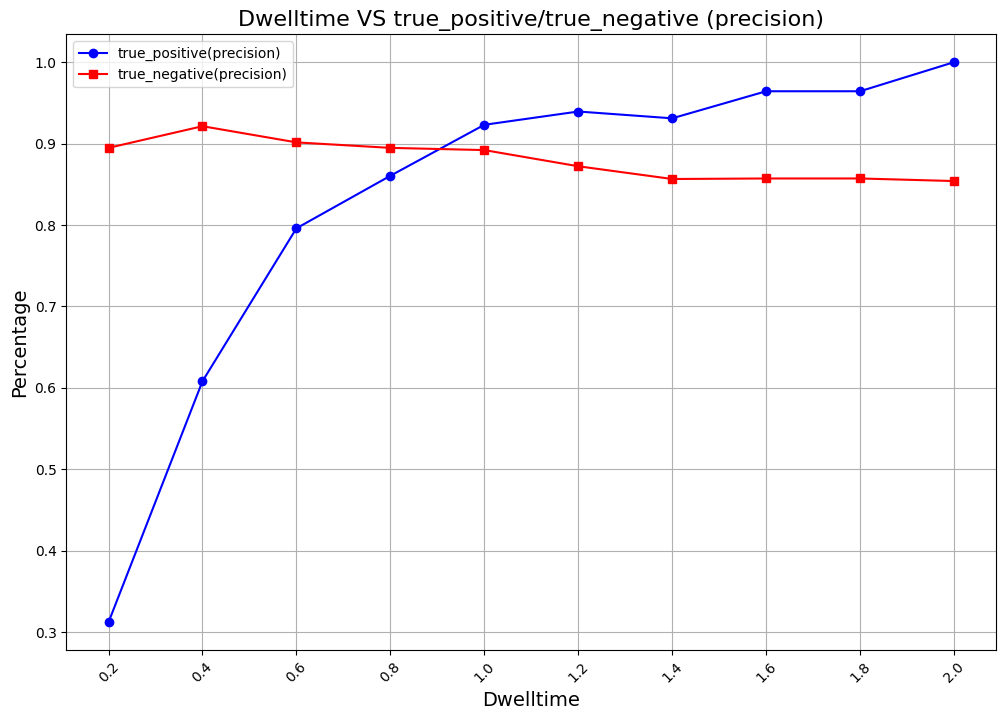

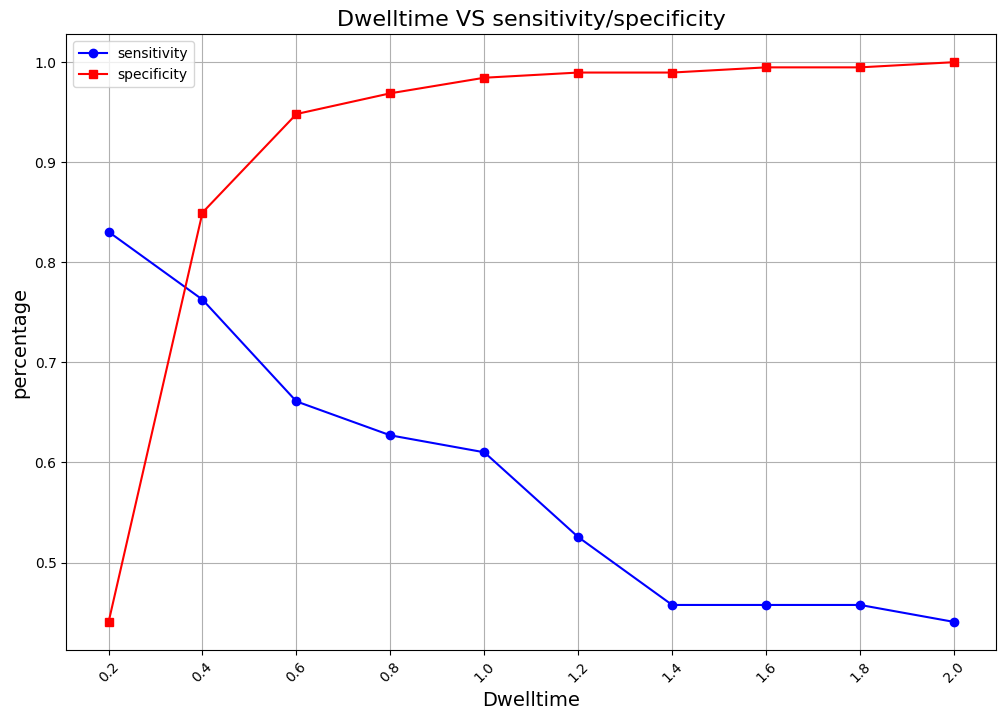

In [5]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='true_positive(precision)')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='true_negative(precision)')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative (precision)', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='sensitivity')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='specificity')

# Adding titles and labels
plt.title('Dwelltime VS sensitivity/specificity', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [6]:
# Specify the file name
file_name = 'eye_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file)
    
# Save the dictionary to a file
with open(graph_file, 'w') as file:
    json.dump(data_for_graph, file)